## Dynamic Time Warping
+ ###### Author: Dirk Van Compernolle   
+ ###### Modification History:   03/03/2023
+ ###### Requires:  pyspch>=0.7

### General Instructions
- Practice DTW by making these exercises with pencil and paper first.
- Using heuristics, eg. for not computing certain cells is allowed; just try to understand why you are allowed to skip certain computations.
- Check your results with the results presented later in this notebook

### Exercises

##### Exercise 1
- You are given two 1-dimensional feature sequences
>  X = [0, 2, 1, 1, 0, 1]   
>  Y = [0 ,1 ,2, 0]      
- a frame level (squared) Euclidean distance metric should be applied.  (computed in [local distance matrix](dtw1_ldmat.png) ) 
- Compute the distance between both sequences and find an optimal alignment using the DTW algorithm in which the basic transitions (+1,+1), (+1,0), and (0,+1) are allowed
- Implement a heuristic to limit the number of computations that implements following target: *an alignment should not diverge all that much from the main diagonal*

##### Exercise 2
- Redo the previous exercise with following modified DTW algorithm, applying following rules
    + "vertical" and "horizontal" moves are not allowed
    + 2:1 possible speedup on either axis is implemented by allowing the transitions (+2,+1), (+1,+2); when taking such a transition you should multiply the local distance cost with 2 ! 
- Some cells in the trellis are NOT reachable with this scheme; which ones ?


In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
# do all the imports
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyspch.dtw as dtw

### Exercise 1

We use the dtw.dtw() module with following arguments:
- trans='DTW'      : implements DTW with the specified basic transitions
- result='details' : returns  DTW distance, alignment, local distance matrix, global distance matrix, backpointers
- also note that 'Euclidean Distance' is the default local distance metric

In the figures, you see:
- **local distance matrix** on the left
- **global distance matrix** on the right
    + with backpointers add in each cell
    + with an alignment added that was found by backtracing


DTW distance: 3.000 


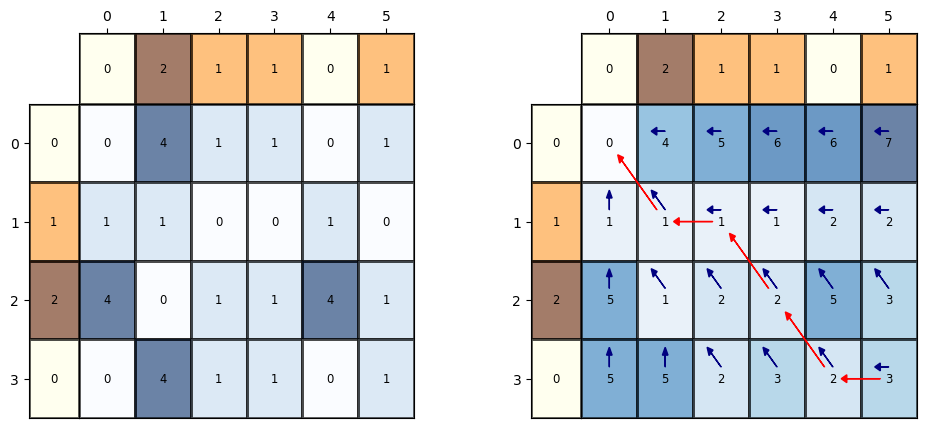

In [3]:
x1d = np.array([0, 2, 1, 1.,0.,1.])
y1d = np.array([0.,1.,2.,0.])
# we also define some plotting arguments for this example
plt_args = {'xy_annot':True,'ftr_annot':True,'fig_width':10,'ftr_scale':.15,'fmt':"{:.0f}",'text_size':"small"}
dist,trace,ld_matrix,cd_matrix,bptrs = dtw.dtw(x1d,y1d,trans='DTW',result='details')
print("DTW distance: %.3f " % dist)
dtw.plot_trellis2(x=x1d,y=y1d,left=ld_matrix,right=cd_matrix,trace=trace,bptrs=bptrs,**plt_args)

### Exercise 2

In comparison to Exercise 1 we need to define these SYMMETRIC ITAKURA constraints.
The dtw() module has some defaults built in, however we define the transitions explicitly for clarity.
The transitions are defined by 
- the transition moves 'dx' and 'dy' (pointing back in time)
- a multiplicative cost: i.e. a factor to multiply the local distance with; here we use a factor '2'
for the long transitions  (an alternative would be to 'collect local distances along the way')

##### RuntimeWarning
You probably will get a *RuntimeWarning* for .. true_divide .. resdat /= (vmax - vmin)   
Neglect this

DTW distance: 3.000 


C:\Users\compi\miniforge3\envs\py310t\lib\site-packages\matplotlib\colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


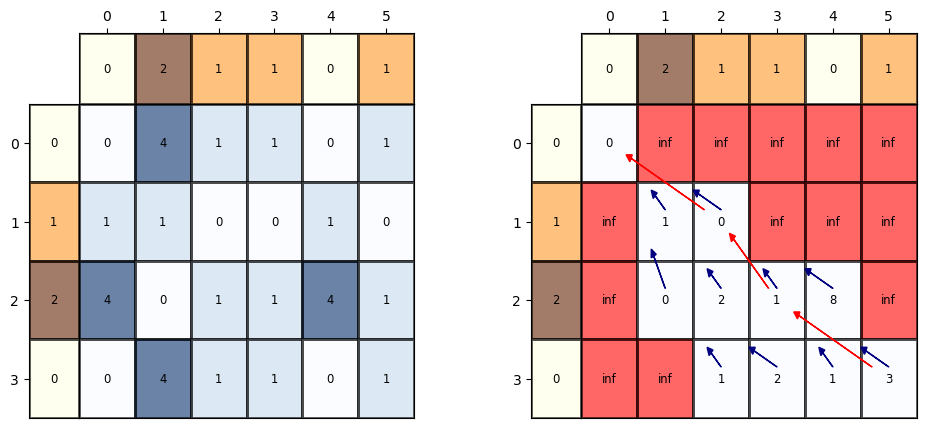

In [4]:
ita_trans = {'dx':[-1,-2,-1], 'dy':[-1,-1,-2], 'm':[1.0,2.0,2.0] }
dist,trace,ld_matrix,cd_matrix,bptrs = dtw.dtw(x1d,y1d,trans=ita_trans,result='details')
print("DTW distance: %.3f " % dist)
dtw.plot_trellis2(x=x1d,y=y1d,left=ld_matrix,right=cd_matrix,trace=trace,bptrs=bptrs,**plt_args)